1)


In [1]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import sympy as sym
from math import sqrt
# np . random . seed ( 0 )
N = 100
half_n = N // 2
r = 10
s = r / 16
t = np.random.uniform(0 ,2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )

In [2]:

def getACircle(X):

    indices = np.random.randint(0,len(X),size = 3)
    while indices[0] == indices[1] or indices[1] == indices[2] or indices[0] == indices[2]:
        indices = np.random.randint(0,len(X),size = 3)
    x1 = X[indices[0],0]
    x2 = X[indices[1],0]
    y1 = X[indices[0],1]
    x3 = X[indices[2],0]
    y2 = X[indices[1],1] 
    y3 = X[indices[2],1]



    x12 = x1 - x2
    x13 = x1 - x3
 
    y12 = y1 - y2
    y13 = y1 - y3
 
    y31 = y3 - y1
    y21 = y2 - y1
 
    x31 = x3 - x1
    x21 = x2 - x1
 
    # x1^2 - x3^2
    sx13 = pow(x1, 2) - pow(x3, 2)
 
    # y1^2 - y3^2
    sy13 = pow(y1, 2) - pow(y3, 2)
 
    sx21 = pow(x2, 2) - pow(x1, 2)
    sy21 = pow(y2, 2) - pow(y1, 2)

  
    f = (((sx13) * (x12) + (sy13) *
        (x12) + (sx21) * (x13) +
        (sy21) * (x13)) / (2 *
        ((y31) * (x12) - (y21) * (x13))))
            
    g = (((sx13) * (y12) + (sy13) * (y12) +
        (sx21) * (y13) + (sy21) * (y13)) /
        (2 * ((x31) * (y12) - (x21) * (y13))))
 
    c = (-pow(x1, 2) - pow(y1, 2) -
         2 * g * x1 - 2 * f * y1)
 
 
    h = -g
    k = -f
    sqr_of_r = h * h + k * k - c
    h = round(h,5)
    k = round(k,5)
    r = round(sqrt(sqr_of_r), 5)

    return h,k,r,indices




In [3]:
def getPoints(h,k,r,X,indices,threshold):
    xlist = []
    ylist = []
    error = 0
    inlierCount = 0
    rqdInlierCount = 40

    for ind in range(len(X)):
        x =  X[ind,0]
        y = X[ind,1]
        distance = round(abs(r - sqrt((x-h)**2 + (y-k)**2)),5)
        if distance <= threshold:
           error += distance
           inlierCount += 1 
           xlist.append(x)
           ylist.append(y)

    rf = np.corrcoef(xlist, ylist)
    if inlierCount >= rqdInlierCount and abs(rf[0][1]) < 0.95:
        meanAbsoluteError = round(error/inlierCount,5)
        return (h ,k ,r, inlierCount, meanAbsoluteError,indices)
       

       


In [4]:
# maxIterations = 100 # N 
# matchedCircles = []
# matchedCircles_2 = []
# for ind in range(maxIterations):
#     h,k,r,indices = getACircle(X)
#     result = getPoints(h,k,r,X,indices)
#     if result:
#         matchedCircles.append(result)
# matchedCircles.sort(reverse= True, key = lambda x: x[3])
# for i in range (len(matchedCircles)):
#     if matchedCircles[i][3] == matchedCircles[0][3]:
#         matchedCircles_2.append(matchedCircles[i])

# bestFit = min(matchedCircles_2,key = lambda x:x[4])

In [5]:
def getInliersAndOutliers(X,h,k,r,threshold):
    ind_inliers = []
    ind_outliers = []
    for i in range(len(X)):
        distance = round(abs(r - sqrt((X[i][0]-h)**2 + (X[i][1]-k)**2)),5)
        if distance <= threshold:
            ind_inliers.append(i)
        else:
            ind_outliers.append(i)
    return ind_inliers,ind_outliers

In [6]:
def RANSAC(X,threshold,N):
    maxIterations = N  # N 
    matchedCircles = []
    matchedCircles_2 = []
    for ind in range(maxIterations):
        h,k,r,indices = getACircle(X)
        result = getPoints(h,k,r,X,indices,threshold)
        if result:
            matchedCircles.append(result)
    matchedCircles.sort(reverse= True, key = lambda x: x[3])
    for i in range (len(matchedCircles)):
        if matchedCircles[i][3] == matchedCircles[0][3]:
            matchedCircles_2.append(matchedCircles[i])

    bestFit = min(matchedCircles_2,key = lambda x:x[4])
    ind_inliers,ind_outliers = getInliersAndOutliers(X,bestFit[0],bestFit[1],bestFit[2],threshold)
    return ind_inliers,ind_outliers,bestFit

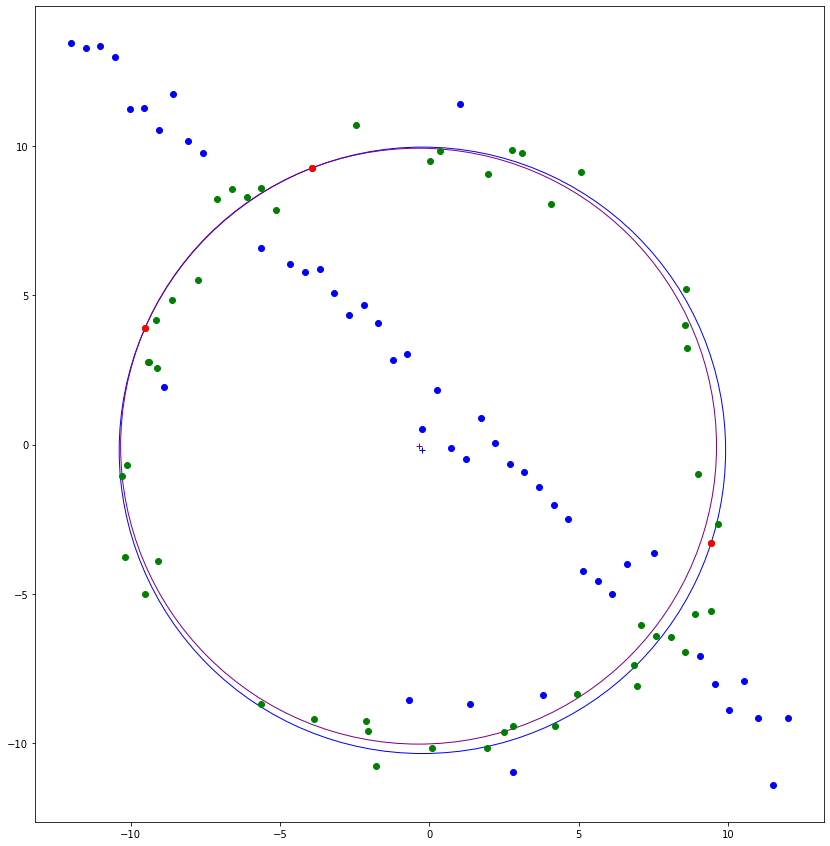

In [7]:
ind_inliers,ind_outliers,bestFit  = RANSAC(X,1,100)
inliers = [X[i] for i in range (len(X)) if i in ind_inliers]
inliers = np.array(inliers)
ind_inliers_1,ind_outliers_1,bestFit_1  = RANSAC(inliers,0.9,70)
figure, axes = plt.subplots(1,1,figsize = (15,15))
draw_circle = plt.Circle((bestFit[0],bestFit[1]),bestFit[2], fill = False,color = 'blue' )
draw_circle_1 = plt.Circle((bestFit_1[0],bestFit_1[1]),bestFit_1[2], fill = False,color = 'purple' )
axes.add_artist(draw_circle)
axes.add_artist(draw_circle_1)
axes.set_aspect(1)

plt.plot(X[ind_inliers,0],X[ind_inliers,1], 'o', color='green')
plt.plot(X[bestFit[-1],0],X[bestFit[-1],1], 'o', color='red')
plt.plot(bestFit[0],bestFit[1], '+', color='blue')
plt.plot(bestFit_1[0],bestFit_1[1], '+', color='purple')
plt.plot(X[ind_outliers,0],X[ind_outliers,1], 'o', color='blue')
plt.show()

2)


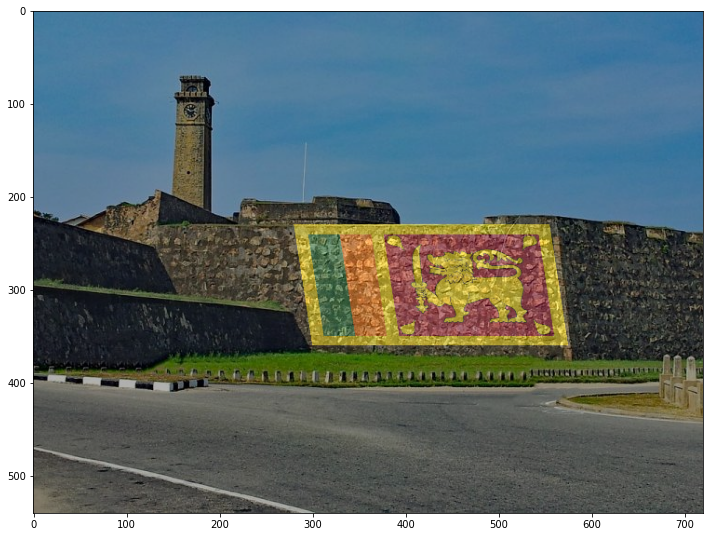

In [9]:
import numpy as np
import matplotlib . pyplot as plt
import cv2 as cv

galleFortImage = plt.imread('gallefort.jpg')
srilankanFlag = plt.imread('srilankanflag.jpg')
fig,ax = plt.subplots(1,1,figsize = (12,12))



pts_dist = np.array([[300,360],[280,230],[555,230],[575,360]])
pts_src = np.array([[0,408],[0,0],[612,0],[612,408]])

h,status = cv.findHomography(pts_src,pts_dist)

im_out = cv.warpPerspective(srilankanFlag,h,(galleFortImage.shape[1],galleFortImage.shape[0]))
result = cv.addWeighted(im_out, 0.4, galleFortImage, 0.7, 0.0)


ax.imshow(result)